In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import ml_utils

In [2]:
def threshold_image(img, threshold=0):
    img = np.float32(img)
    [thresh, img] = cv2.threshold(img, threshold, 6, cv2.THRESH_BINARY)
    return img

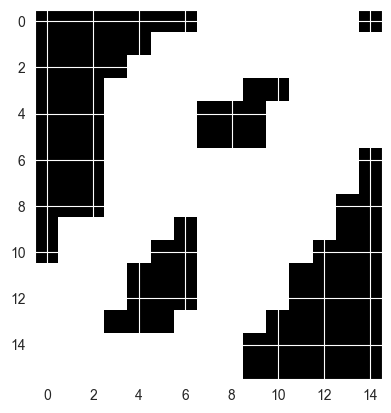

In [6]:
raw_data = ml_utils.load_data()

test_img = raw_data[1750].reshape(16,15)

img = threshold_image(test_img)

fig = plt.figure()
plt.imshow(img, cmap='gray', vmin=0, vmax=1)

In [7]:
def count_circles(img, threshold=0):
    img = threshold_image(img, threshold)
    img = cv2.convertScaleAbs(img)

    contours = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    hierarchy = contours[1] if len(contours) == 2 else contours[2]
    contours = contours[0] if len(contours) == 2 else contours[1]

    hierarchy = hierarchy[0]

    count = 0
    result = img.copy()
    result = cv2.merge([result, result, result])

    for component in zip(contours, hierarchy):
        contour_component = component[0]
        hierarchy_component = component[1]

        if (hierarchy_component[3] > -1) & (hierarchy_component[2] < 0):
            count += 1
            cv2.drawContours(result, [contour_component], 0, (0, 0, 255), 2)

    return count

In [8]:
def get_circle_data(data, threshold=0):
    counter = 0
    circle_counts = []

    for digit in data:
        img = digit.reshape(16, 15)
        circle_count = count_circles(img, threshold)
        circle_counts.append(circle_count)
        #print("Circles in digit ", counter, ": ", circle_count)
        counter += 1

    circle_counts = np.array(circle_counts)
    return circle_counts

In [9]:
circle_data = get_circle_data(raw_data)

In [10]:
print(max(circle_data))

3


In [11]:

for digit in range(10):
    results = [0 for _ in range(max(circle_data + 1))]
    for i in range(200):
        results[circle_data[digit * 200 + i]] += 1
    print(digit, results)


0 [1, 196, 2, 1]
1 [197, 3, 0, 0]
2 [159, 33, 7, 1]
3 [191, 8, 1, 0]
4 [164, 30, 4, 2]
5 [162, 32, 3, 3]
6 [3, 191, 6, 0]
7 [195, 4, 1, 0]
8 [0, 5, 189, 6]
9 [4, 191, 5, 0]


In [24]:
train_set = [raw_data[x * 200:x * 200 + 100] for x in range(10)]
train_set = np.array(train_set).reshape((1000, 16, 15))
# plt.imshow(train_set[99], cmap='gray', vmin=0, vmax=6)
# plt.show()
# plt.imshow(train_set[100], cmap='gray', vmin=0, vmax=6)
# plt.show()


In [25]:
results = []
for threshold in range(10):
    results.append(get_circle_data(train_set, threshold=threshold / 10))


In [26]:
for threshold, circle_data in enumerate(results):
    print(f'threshold {threshold / 10}')
    for digit in range(10):
        circle_counts = [0 for _ in range(max(circle_data + 1))]
        for i in range(100):
            circle_counts[circle_data[digit * 100 + i]] += 1
        print(digit, circle_counts)

threshold 0.0
0 [0, 99, 1, 0]
1 [98, 2, 0, 0]
2 [81, 16, 2, 1]
3 [96, 4, 0, 0]
4 [78, 19, 3, 0]
5 [83, 13, 2, 2]
6 [0, 96, 4, 0]
7 [99, 0, 1, 0]
8 [0, 3, 92, 5]
9 [1, 96, 3, 0]
threshold 0.1
0 [0, 99, 1, 0]
1 [98, 2, 0, 0]
2 [81, 16, 2, 1]
3 [96, 4, 0, 0]
4 [78, 19, 3, 0]
5 [83, 13, 2, 2]
6 [0, 96, 4, 0]
7 [99, 0, 1, 0]
8 [0, 3, 92, 5]
9 [1, 96, 3, 0]
threshold 0.2
0 [0, 100, 0, 0, 0, 0]
1 [98, 2, 0, 0, 0, 0]
2 [89, 10, 1, 0, 0, 0]
3 [99, 1, 0, 0, 0, 0]
4 [89, 10, 1, 0, 0, 0]
5 [90, 7, 3, 0, 0, 0]
6 [0, 100, 0, 0, 0, 0]
7 [99, 1, 0, 0, 0, 0]
8 [0, 3, 95, 1, 0, 1]
9 [2, 98, 0, 0, 0, 0]
threshold 0.3
0 [0, 100, 0, 0, 0, 0]
1 [98, 2, 0, 0, 0, 0]
2 [89, 10, 1, 0, 0, 0]
3 [99, 1, 0, 0, 0, 0]
4 [89, 10, 1, 0, 0, 0]
5 [90, 7, 3, 0, 0, 0]
6 [0, 100, 0, 0, 0, 0]
7 [99, 1, 0, 0, 0, 0]
8 [0, 3, 95, 1, 0, 1]
9 [2, 98, 0, 0, 0, 0]
threshold 0.4
0 [0, 100, 0, 0, 0]
1 [99, 1, 0, 0, 0]
2 [97, 3, 0, 0, 0]
3 [100, 0, 0, 0, 0]
4 [93, 6, 1, 0, 0]
5 [95, 4, 1, 0, 0]
6 [0, 99, 1, 0, 0]
7 [99, 1, 0, 0, 0]
8 

In [31]:
results=np.array(results)
results.shape

(10, 1000)

In [32]:
expected = [1, 0, 0, 0, 0, 0, 1, 0, 2, 1]
as_expected_arr = np.zeros(results.shape[0])
for threshold, circle_data in enumerate(results):
    print(f'threshold {threshold / 10}')
    as_expected = 0
    for digit in range(10):
        circle_counts = [0 for _ in range(max(circle_data + 1))]
        for i in range(100):
            if circle_data[digit * 100 + i] == expected[digit]: as_expected+=1
    print(as_expected)
    as_expected_arr[threshold] = as_expected

threshold 0.0
918
threshold 0.1
918
threshold 0.2
957
threshold 0.3
957
threshold 0.4
973
threshold 0.5
983
threshold 0.6
983
threshold 0.7
923
threshold 0.8
923
threshold 0.9
915


In [41]:
best_threshold=np.argmax(as_expected_arr)/10
print(f'threshold with the best results: {best_threshold}')

threshold with the best results: 0.5
